# Importing libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\test_lAUu6dG.csv')
submission = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\sample_submission_49d68Cx.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory Data Analysis

In [5]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train.shape, test.shape))

Train dataset shape: (614, 13), 
Test dataset shape: (367, 12)


In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [12]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [16]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [18]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

### Missing Value Handling 

In [20]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
non_num_cols = train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']]
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']:
    train[col] = train[col].fillna(train[col].mode()[0])
num_cols = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
    train[col] = train[col].fillna(train[col].median())
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
non_num_cols = test[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']]
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']:
    test[col] = test[col].fillna(test[col].mode()[0])
num_cols = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
    test[col] = test[col].fillna(test[col].median())
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Plots and Graphs 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

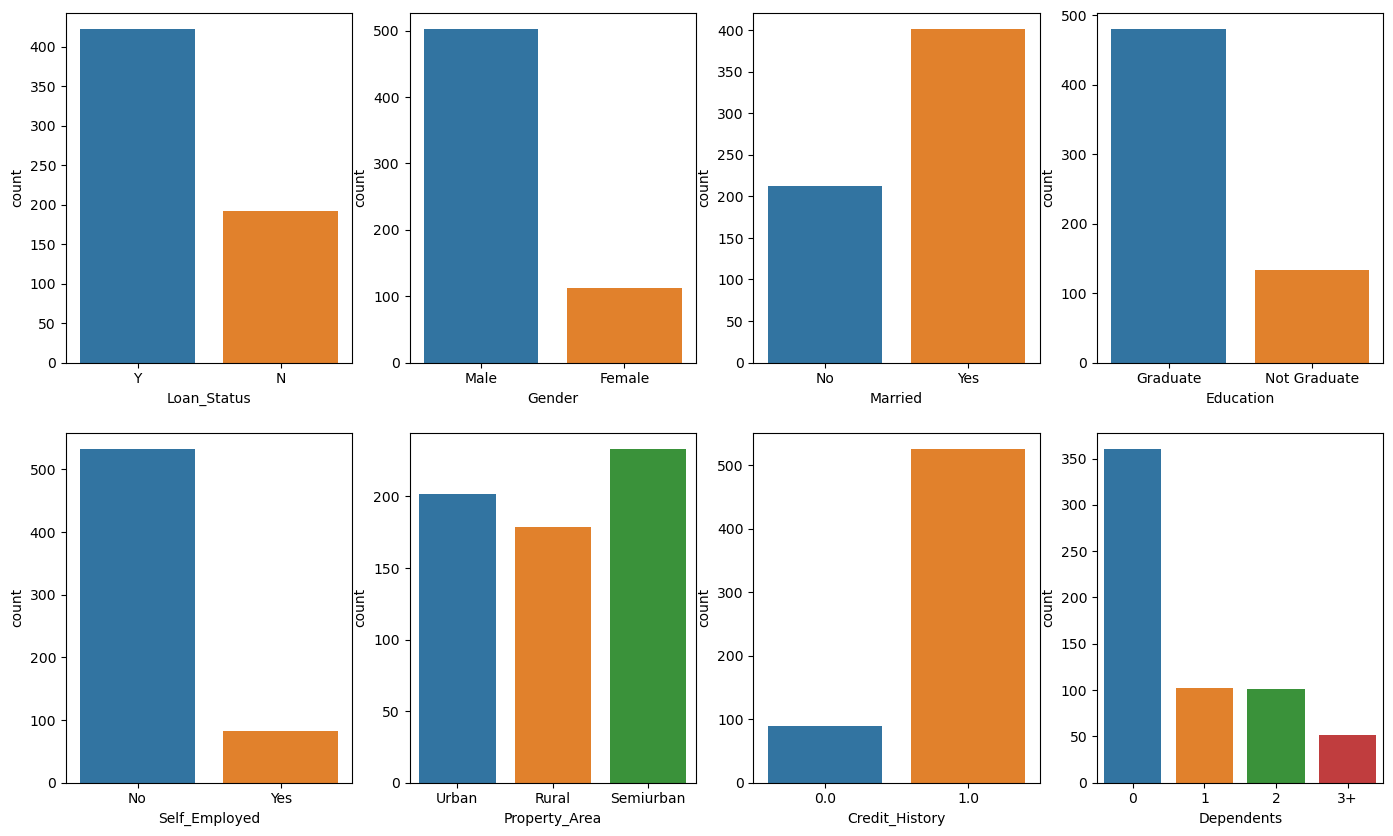

In [24]:
#Countplots

fig, ax = plt.subplots(2,4,figsize=(17,10))
sns.countplot('Loan_Status',data=train,ax=ax[0, 0])
sns.countplot('Gender',data=train,ax=ax[0, 1])
sns.countplot('Married',data=train,ax=ax[0, 2])
sns.countplot('Education',data=train,ax=ax[0, 3])
sns.countplot('Self_Employed',data=train,ax=ax[1, 0])
sns.countplot('Property_Area',data=train,ax=ax[1, 1])
sns.countplot('Credit_History',data=train,ax=ax[1, 2])
sns.countplot('Dependents',data=train,ax=ax[1, 3])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

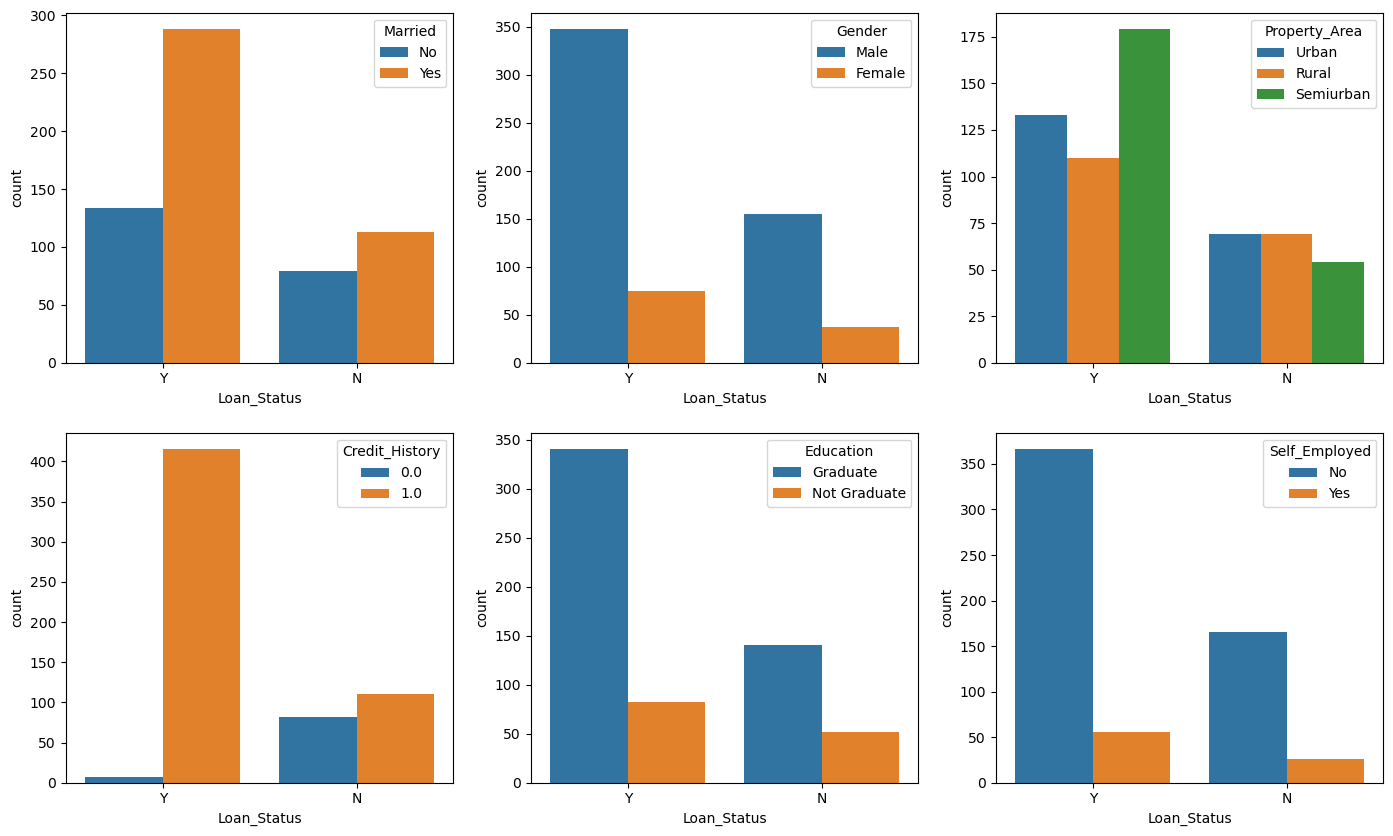

In [25]:
#Combined Countplots

fig, ax = plt.subplots(2,3,figsize=(17,10))
sns.countplot('Loan_Status',hue='Married',data=train,ax=ax[0, 0])
sns.countplot('Loan_Status',hue='Gender',data=train,ax=ax[0, 1])
sns.countplot('Loan_Status',hue='Property_Area',data=train,ax=ax[0, 2])
sns.countplot('Loan_Status',hue='Credit_History',data=train,ax=ax[1,0])
sns.countplot('Loan_Status',hue='Education',data=train,ax=ax[1,1])
sns.countplot('Loan_Status',hue='Self_Employed',data=train,ax=ax[1,2])

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

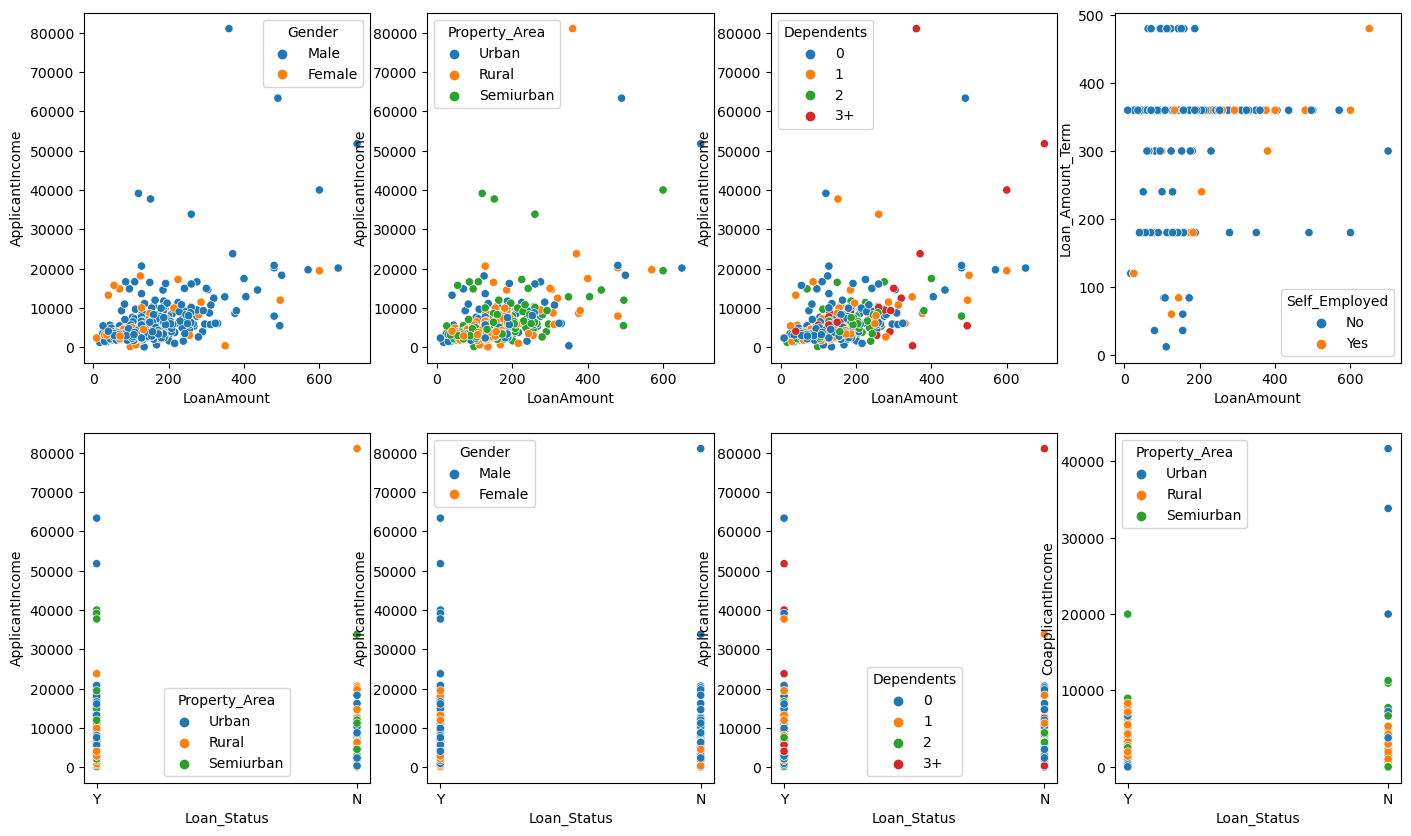

In [26]:
#Scatter plots

fig, ax = plt.subplots(2,4,figsize=(17,10))
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Gender',data=train,ax=ax[0,0])
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Property_Area',data=train,ax=ax[0,1])
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Dependents',data=train,ax=ax[0,2])
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',hue='Self_Employed',data=train,ax=ax[0,3])
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',hue='Property_Area',data=train,ax=ax[1,0])
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=train,ax=ax[1,1])
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',hue='Dependents',data=train,ax=ax[1,2])
sns.scatterplot(x='Loan_Status',y='CoapplicantIncome',hue='Property_Area',data=train,ax=ax[1,3])

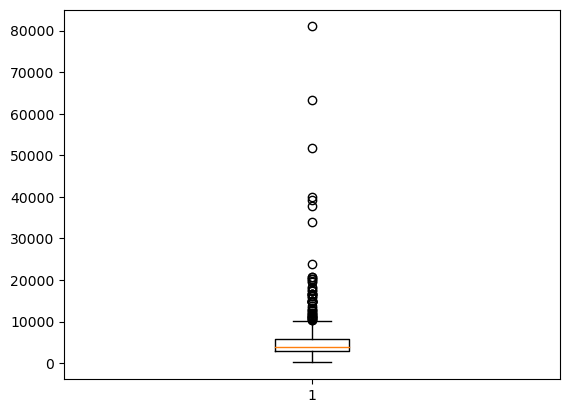

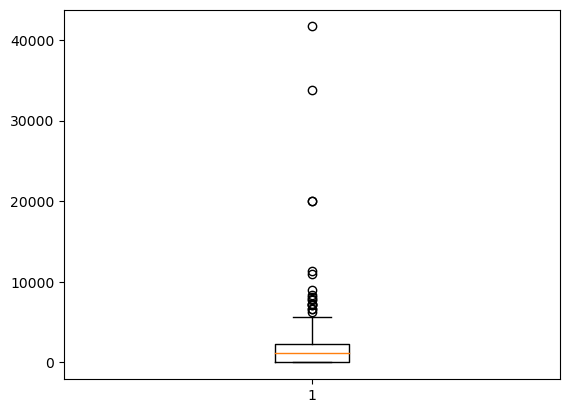

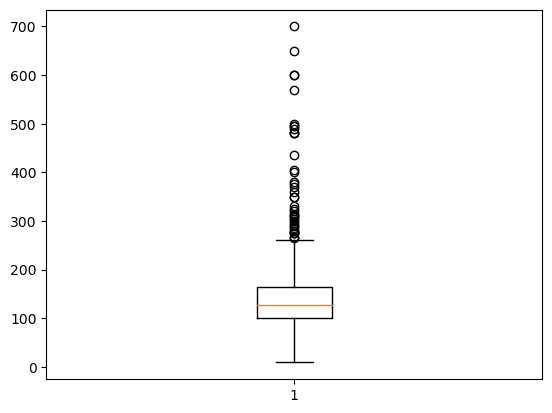

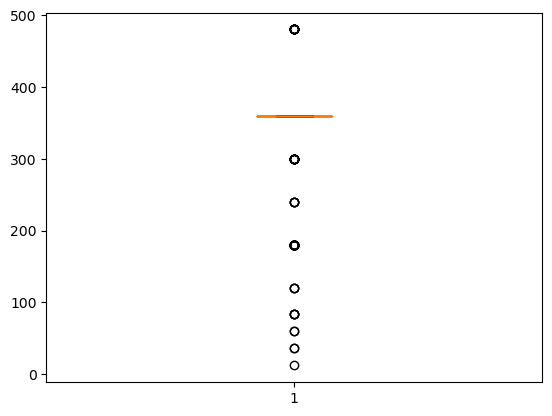

In [27]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']:
    plt.figure 
    plt.boxplot(train[i])
    plt.title
    plt.show()

### Encoding and Scaling

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [29]:
for i in train:
    label_encoder = preprocessing.LabelEncoder()
    train[i]= label_encoder.fit_transform(train[i])

In [30]:
for i in test:
    label_encoder = preprocessing.LabelEncoder()
    test[i]= label_encoder.fit_transform(test[i])

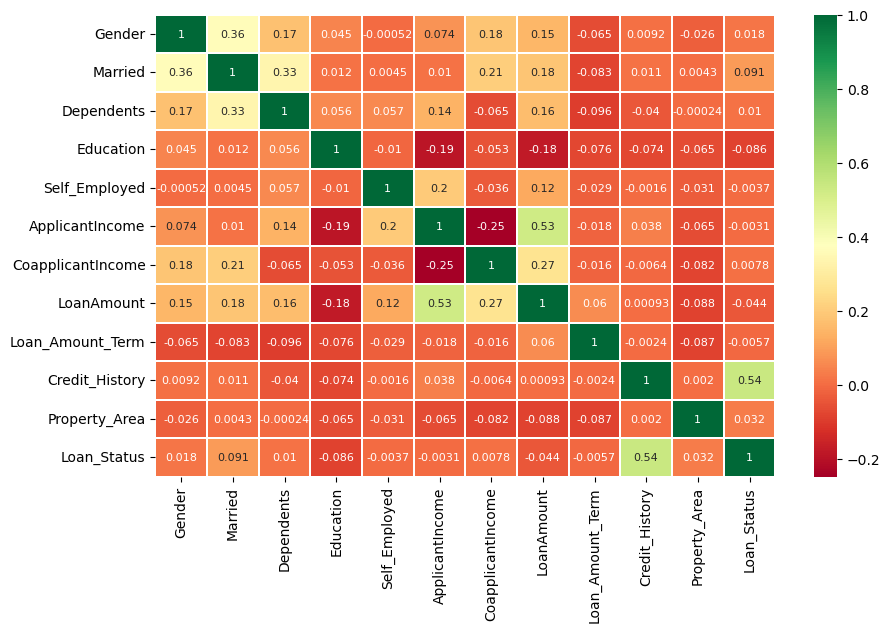

In [31]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [32]:
y = train.Loan_Status
x = train.drop('Loan_Status',1) 
X_test = test.iloc[:-1].values

In [33]:
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
train_x, test_x,train_y,test_y = train_test_split(x, y, test_size=0.2, random_state=2)

print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (491, 11), 
Test dataset shape: (123, 11)


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_test_sc =  sc.transform(X_test)

## Logistic Regression 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3,random_state = 42)
clf = LogisticRegression()
model = clf.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [36]:
x_test.shape, y_test.shape, y_pred.shape

((185, 11), (185,), (185,))

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_lr = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred,average='micro'))
print("Recall =",recall_score(y_test,y_pred,average='micro'))
print("f1 Score=",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.7837837837837838
Precision = 0.7837837837837838
Recall = 0.7837837837837838
f1 Score= 0.7837837837837838


In [38]:
pred_test = model.predict(test)

In [39]:
train = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\test_lAUu6dG.csv')
submission = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Virtual Competition\sample_submission_49d68Cx.csv')

In [40]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [41]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('SubmissionL.csv')